In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif

In [3]:
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import auc, roc_curve

In [4]:
# Import and view dataset
transaction_data = pd.read_csv('preprocessed_transaction_data.csv')
print(transaction_data.head())

   step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0    11  427818.23       198219.0            0.00            0.00   
1    20   80828.54            0.0            0.00      5149991.49   
2    20  106069.89       301258.0       195188.11       263816.83   
3    18  402832.90        11665.0            0.00        28550.98   
4    22   34643.49            0.0            0.00       346081.41   

   newbalanceDest  isFraud  type_TRANSFER  origBalanceDiscrepancy  \
0       427818.23        0              0               229599.23   
1      5230820.04        0              0                80828.54   
2       369886.72        0              1                    0.00   
3       431383.87        0              0               391167.90   
4       380724.90        0              0                34643.49   

   destBalanceDiscrepancy  
0            0.000000e+00  
1           -1.000000e-02  
2            5.820766e-11  
3            1.000000e-02  
4           -5.820766e-11  


In [5]:
print(transaction_data['isFraud'].value_counts())

0    80498
1     7500
Name: isFraud, dtype: int64


In [6]:
print(transaction_data['isFraud'].value_counts(normalize=True))

0    0.914771
1    0.085229
Name: isFraud, dtype: float64


In [7]:
# tdata = transaction_data.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [8]:
# print(tdata['isFraud'].value_counts())

In [9]:
# print(tdata['isFraud'].value_counts(normalize=True))

In [10]:
# Setup variables
X = transaction_data.drop(['isFraud'], axis=1)
y = transaction_data['isFraud']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(61598, 9) (26400, 9)


In [12]:
# Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Bernoulli
from sklearn.naive_bayes import BernoulliNB
bern_clf = BernoulliNB()
bern_clf.fit(X_train, y_train)
y_pred_bern = bern_clf.predict(X_test)
print(y_pred_bern[:5])

[0 0 0 0 0]


In [14]:
# Bernoulli results
print('Bernoulli\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_bern))
print('Precision: ', precision_score(y_test, y_pred_bern))
print('Recall: ', recall_score(y_test, y_pred_bern))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_bern, average='weighted'))

Bernoulli

Accuracy:  0.9584469696969697
Precision:  0.8853545394300861
Recall:  0.5911504424778761
Avg F1-score: 0.9546


In [15]:
# Logistic Regression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
y_pred_logistic = logistic_clf.predict(X_test)
print(y_pred_logistic[:5])

[0 0 0 0 0]


In [16]:
# LR results
print('Logistic Regression\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_logistic))
print('Precision: ', precision_score(y_test, y_pred_logistic))
print('Recall: ', recall_score(y_test, y_pred_logistic))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_logistic, average='weighted'))

Logistic Regression

Accuracy:  0.970719696969697
Precision:  0.9270534175761057
Recall:  0.7141592920353982
Avg F1-score: 0.9690


In [17]:
# Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred_gnb = gnb_clf.predict(X_test)
print(y_pred_gnb[:5])

[0 0 0 0 0]


In [18]:
# Naive Bayes results
print('Naive Bayes\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_gnb))
print('Precision: ', precision_score(y_test, y_pred_gnb))
print('Recall: ', recall_score(y_test, y_pred_gnb))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_gnb, average='weighted'))

Naive Bayes

Accuracy:  0.9390909090909091
Precision:  0.7235939643347051
Recall:  0.4668141592920354
Avg F1-score: 0.9330


In [19]:
# Random Forest
rf_clf = RandomForestClassifier(criterion='entropy',min_samples_split=3)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(y_pred_rf[:5])

[0 0 0 0 0]


In [20]:
# RF results
print('Random Forest\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest

Accuracy:  0.9995454545454545
Precision:  0.9991119005328597
Recall:  0.995575221238938
Avg F1-score: 0.9995


In [21]:
# Decision Tree Classification
cart_clf = DecisionTreeClassifier(criterion="entropy", max_depth=4) # optional--- criterion="entropy", max_depth=4
cart_clf.fit(X_train, y_train)
y_pred_cart = cart_clf.predict(X_test)
print(y_pred_cart[:5])

[0 0 0 0 0]


In [22]:
# Decision Tree results
print('Decision Tree\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_cart))
print('Precision: ', precision_score(y_test, y_pred_cart))
print('Recall: ', recall_score(y_test, y_pred_cart))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_cart, average='weighted'))

Decision Tree

Accuracy:  0.9995454545454545
Precision:  0.9991119005328597
Recall:  0.995575221238938
Avg F1-score: 0.9995


In [23]:
from sklearn.linear_model import SGDClassifier
# SGD
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)
print(y_pred_sgd[:5])

[0 0 0 0 0]


In [24]:
# SGD results
print('SGD\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_sgd))
print('Precision: ', precision_score(y_test, y_pred_sgd))
print('Recall: ', recall_score(y_test, y_pred_sgd))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_sgd, average='weighted'))

SGD

Accuracy:  0.9686742424242424
Precision:  0.9158444573418456
Recall:  0.6982300884955752
Avg F1-score: 0.9667


In [25]:
# XGBoost
xgboost_clf = XGBClassifier(max_depth=8)
xgboost_clf.fit(X_train, y_train)
y_pred_xgboost = xgboost_clf.predict(X_test)
print(y_pred_xgboost[:5])

[0 0 0 0 0]


In [26]:
# XGBoost results
print('XGBoost\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_xgboost))
print('Precision: ', precision_score(y_test, y_pred_xgboost))
print('Recall: ', recall_score(y_test, y_pred_xgboost))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_xgboost, average='weighted'))

XGBoost

Accuracy:  0.9995833333333334
Precision:  0.9995557529986673
Recall:  0.995575221238938
Avg F1-score: 0.9996


In [27]:
# KNN examination
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print(mean_acc)

[0.98151515 0.98363636 0.98291667 0.98367424 0.98280303 0.98363636
 0.98344697 0.98333333 0.98280303]


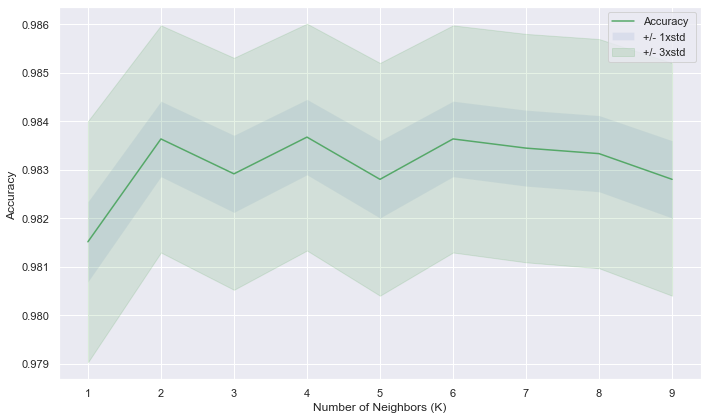

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
print("The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.9836742424242424 with k = 4


In [30]:
# KNN
neigh_clf = KNeighborsClassifier(n_neighbors=4) # select k with highest accuracy above
neigh_clf.fit(X_train, y_train)
y_pred_neigh = neigh_clf.predict(X_test)
print(y_pred_neigh[:5])

[0 0 0 0 0]


In [31]:
# KNN results
print('KNN\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_neigh))
print('Precision: ', precision_score(y_test, y_pred_neigh))
print('Recall: ', recall_score(y_test, y_pred_neigh))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_neigh, average='weighted'))

KNN

Accuracy:  0.9836742424242424
Precision:  0.9428571428571428
Recall:  0.8615044247787611
Avg F1-score: 0.9833


In [32]:
# Explore ROC. AUC for ROC curves for different algorithmns are obtained.

# LR
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
AUC_logistic = auc(fpr_logistic, tpr_logistic)
print('AUC for Logistic Regression :', AUC_logistic)

AUC for Logistic Regression : 0.8544491572024546


In [33]:
# Bernoulli
fpr_bern, tpr_bern, _ = roc_curve(y_test, y_pred_bern)
AUC_bern = auc(fpr_bern, tpr_bern)
print('AUC for Bernoulli Bayes :', AUC_bern)

AUC for Bernoulli Bayes : 0.7919919569473058


In [34]:
# NB
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)
AUC_gnb = auc(fpr_gnb, tpr_gnb)
print('AUC for Naive Bayes :', AUC_gnb)

AUC for Naive Bayes : 0.7250599379724468


In [35]:
# RF 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
AUC_rf = auc(fpr_rf, tpr_rf)
print('AUC for Random Forest :', AUC_rf)

AUC for Random Forest : 0.9977461855987564


In [36]:
# Decision Tree
fpr_cart, tpr_cart, _ = roc_curve(y_test, y_pred_cart)
AUC_cart = auc(fpr_cart, tpr_cart)
print('AUC for Decision Tree :', AUC_cart)

AUC for Decision Tree : 0.9977461855987564


In [37]:
# SGD
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_pred_sgd)
AUC_sgd = auc(fpr_sgd, tpr_sgd)
print('AUC for SGD :', AUC_sgd)

AUC for SGD : 0.8461117302461306


In [38]:
# XGBoost
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred_xgboost)
AUC_xgboost = auc(fpr_xgboost, tpr_xgboost)
print('AUC for XGBoost :', AUC_xgboost)

AUC for XGBoost : 0.9977668981091127


In [39]:
# KNN
fpr_neigh, tpr_neigh, _ = roc_curve(y_test, y_pred_neigh)
AUC_neigh = auc(fpr_neigh, tpr_neigh)
print('AUC for KNN :', AUC_neigh)

AUC for KNN : 0.9283081361673424


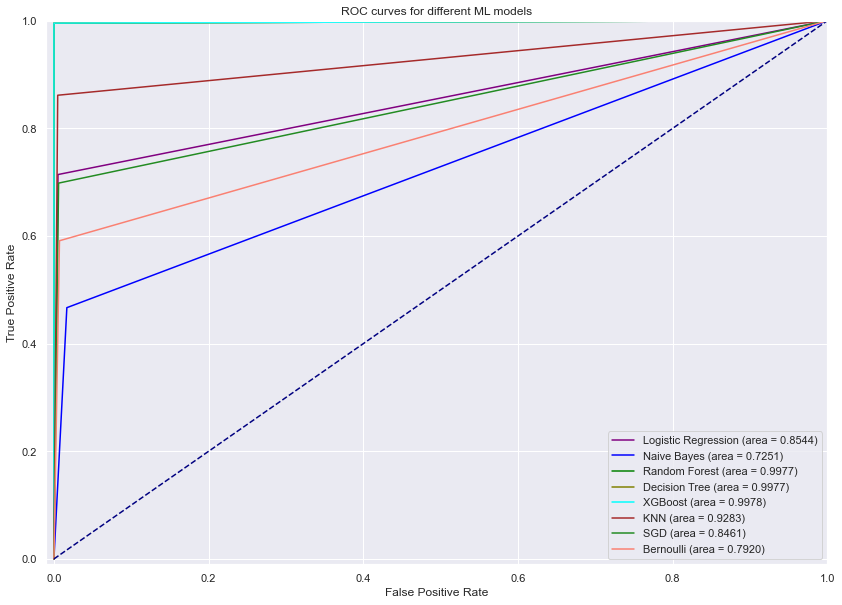

In [40]:
# ROC curves are drawn for different algorithms
plt.figure(figsize=(14, 10))

plt.plot(fpr_logistic, tpr_logistic, color='purple',
         label='Logistic Regression (area = %0.4f)' % AUC_logistic)

plt.plot(fpr_gnb, tpr_gnb, color='blue',
         label='Naive Bayes (area = %0.4f)' % AUC_gnb)

plt.plot(fpr_rf, tpr_rf, color='green',
         label='Random Forest (area = %0.4f)' % AUC_rf)

plt.plot(fpr_cart, tpr_cart, color='olive',
         label='Decision Tree (area = %0.4f)' % AUC_cart)

plt.plot(fpr_xgboost, tpr_xgboost, color='cyan',
         label='XGBoost (area = %0.4f)' % AUC_xgboost)

plt.plot(fpr_neigh, tpr_neigh, color='brown',
         label='KNN (area = %0.4f)' % AUC_neigh)

plt.plot(fpr_sgd, tpr_sgd, color='forestgreen',
         label='SGD (area = %0.4f)' % AUC_sgd)

plt.plot(fpr_bern, tpr_bern, color='salmon',
         label='Bernoulli (area = %0.4f)' % AUC_bern)


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curves for different ML models')
plt.legend(loc='lower right')
plt.show()

In [41]:
# Cross Validation scores
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(logistic_clf, X, y, cv=5)
nb_scores = cross_val_score(gnb_clf, X, y, cv=5)
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
dt_scores = cross_val_score(cart_clf, X, y, cv=5)
xgb_scores = cross_val_score(xgboost_clf, X, y, cv=5)
knn_scores = cross_val_score(neigh_clf, X, y, cv=5)
sgd_scores = cross_val_score(sgd_clf, X, y, cv=5)
bern_scores = cross_val_score(bern_clf, X, y, cv=5)

print("Logistic Regression %0.4f accuracy" % (lr_scores.mean()))
print("Naive Bayes %0.4f accuracy" % (nb_scores.mean()))
print("Random Forest %0.4f accuracy" % (rf_scores.mean()))
print("Decision Tree %0.4f accuracy" % (dt_scores.mean()))
print("XGBoost %0.4f accuracy" % (xgb_scores.mean()))
print("KNN %0.4f accuracy" % (knn_scores.mean()))
print("SGD %0.4f accuracy" % (sgd_scores.mean()))
print("Bernoulli %0.4f accuracy" % (bern_scores.mean()))

Logistic Regression 0.9690 accuracy
Naive Bayes 0.9395 accuracy
Random Forest 0.9996 accuracy
Decision Tree 0.9996 accuracy
XGBoost 0.9996 accuracy
KNN 0.9834 accuracy
SGD 0.9480 accuracy
Bernoulli 0.9676 accuracy


In [42]:
# Find features of best performing model based on permutation importance
from sklearn.inspection import permutation_importance
r = permutation_importance(xgboost_clf, X_test, y_test, # alternate 1st condition: model name from cross_val_score above
                         n_repeats=30,
                          random_state=0)

In [43]:
# Display features list
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}"
              f" {r.importances_mean[i]:.3f}"
             f" +/- {r.importances_std[i]:.3f}")

origBalanceDiscrepancy 0.204 +/- 0.001
newbalanceOrig 0.085 +/- 0.001
oldbalanceDest 0.004 +/- 0.000
oldbalanceOrg 0.002 +/- 0.000
amount   0.001 +/- 0.000


In [44]:
# For Decision Tree model
from sklearn import tree
from sklearn.tree import export_text
output = export_text(cart_clf, feature_names = list(X.columns))
print(output)

|--- origBalanceDiscrepancy <= -0.31
|   |--- newbalanceOrig <= -0.05
|   |   |--- class: 1
|   |--- newbalanceOrig >  -0.05
|   |   |--- oldbalanceOrg <= 6.29
|   |   |   |--- amount <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  0.50
|   |   |   |   |--- class: 0
|   |   |--- oldbalanceOrg >  6.29
|   |   |   |--- class: 1
|--- origBalanceDiscrepancy >  -0.31
|   |--- newbalanceOrig <= 1.02
|   |   |--- oldbalanceDest <= -0.40
|   |   |   |--- oldbalanceOrg <= -0.15
|   |   |   |   |--- class: 0
|   |   |   |--- oldbalanceOrg >  -0.15
|   |   |   |   |--- class: 0
|   |   |--- oldbalanceDest >  -0.40
|   |   |   |--- destBalanceDiscrepancy <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- destBalanceDiscrepancy >  0.44
|   |   |   |   |--- class: 0
|   |--- newbalanceOrig >  1.02
|   |   |--- class: 1



In [45]:
# For Tensorflow/Keras Neural Networks
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [46]:
transaction_data1 = transaction_data.reindex(columns = [col for col in transaction_data.columns if col != 'isFraud'] + ['isFraud'])
transaction_data1

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_TRANSFER,origBalanceDiscrepancy,destBalanceDiscrepancy,isFraud
0,11,427818.23,198219.00,0.00,0.00,427818.23,0,229599.23,0.000000e+00,0
1,20,80828.54,0.00,0.00,5149991.49,5230820.04,0,80828.54,-1.000000e-02,0
2,20,106069.89,301258.00,195188.11,263816.83,369886.72,1,0.00,5.820766e-11,0
3,18,402832.90,11665.00,0.00,28550.98,431383.87,0,391167.90,1.000000e-02,0
4,22,34643.49,0.00,0.00,346081.41,380724.90,0,34643.49,-5.820766e-11,0
...,...,...,...,...,...,...,...,...,...,...
87993,20,19742.71,19742.71,0.00,2098671.68,2118414.39,0,0.00,0.000000e+00,1
87994,14,298365.86,298365.86,0.00,0.00,298365.86,0,0.00,0.000000e+00,1
87995,14,1468304.35,1468304.35,0.00,0.00,0.00,1,0.00,1.468304e+06,1
87996,2,2984434.36,2984434.36,0.00,5498919.48,8483353.84,0,0.00,0.000000e+00,1


In [47]:
#convert the data into array
dataset = transaction_data1.values
dataset

array([[ 1.10000000e+01,  4.27818230e+05,  1.98219000e+05, ...,
         2.29599230e+05,  0.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+01,  8.08285400e+04,  0.00000000e+00, ...,
         8.08285400e+04, -9.99999978e-03,  0.00000000e+00],
       [ 2.00000000e+01,  1.06069890e+05,  3.01258000e+05, ...,
         0.00000000e+00,  5.82076609e-11,  0.00000000e+00],
       ...,
       [ 1.40000000e+01,  1.46830435e+06,  1.46830435e+06, ...,
         0.00000000e+00,  1.46830435e+06,  1.00000000e+00],
       [ 2.00000000e+00,  2.98443436e+06,  2.98443436e+06, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 4.00000000e+00,  2.54719630e+05,  2.54719630e+05, ...,
         0.00000000e+00,  2.54719630e+05,  1.00000000e+00]])

In [48]:
X2 = dataset[:, 0:9]
y2 = dataset[:, 9]

In [49]:
features = ['step','amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type_TRANSFER','origBalanceDiscrepancy','destBalanceDiscrepancy'
       ]

In [50]:
scaler2 = StandardScaler()
X_scale2 = scaler2.fit_transform(X2)
X_scale2

array([[-0.89591634,  0.01781064,  0.01597451, ..., -0.52723989,
        -0.03773258, -0.040063  ],
       [ 1.12649138, -0.2952046 , -0.15644595, ..., -0.52723989,
        -0.2230114 , -0.04006301],
       [ 1.12649138, -0.27243468,  0.10560281, ...,  1.89666983,
        -0.32367515, -0.040063  ],
       ...,
       [-0.22178043,  0.95642069,  1.12075609, ...,  1.89666983,
        -0.32367515,  1.71550034],
       [-2.91832405,  2.32410339,  2.4395592 , ..., -0.52723989,
        -0.32367515, -0.040063  ],
       [-2.46890011, -0.13833953,  0.06512149, ...,  1.89666983,
        -0.32367515,  0.26448997]])

In [51]:
#split the data 80% training and 20% testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale2, y2, test_size=0.2, random_state = 4)

In [52]:
#Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # 1 because its a binary classification
])

In [53]:
#Compile the model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [54]:
hist = model.fit(X_train2, y_train2, epochs=80)

Epoch 1/80
2200/2200 [==============================] - 18s 7ms/step - loss: 0.0987 - accuracy: 0.9707 - precision: 0.9269 - recall: 0.7097
Epoch 2/80
2200/2200 [==============================] - 16s 7ms/step - loss: 0.0688 - accuracy: 0.9779 - precision: 0.9390 - recall: 0.7898
Epoch 3/80
2200/2200 [==============================] - 17s 8ms/step - loss: 0.0587 - accuracy: 0.9820 - precision: 0.9320 - recall: 0.8485
Epoch 4/80
2200/2200 [==============================] - 18s 8ms/step - loss: 0.2915 - accuracy: 0.9825 - precision: 0.9343 - recall: 0.8531
Epoch 5/80
2200/2200 [==============================] - 18s 8ms/step - loss: 0.3184 - accuracy: 0.9827 - precision: 0.9243 - recall: 0.8665
Epoch 6/80
2200/2200 [==============================] - 13s 6ms/step - loss: 0.2490 - accuracy: 0.9825 - precision: 0.9274 - recall: 0.8606
Epoch 7/80
2200/2200 [==============================] - 15s 7ms/step - loss: 0.2260 - accuracy: 0.9833 - precision: 0.9343 - recall: 0.8628
Epoch 8/80
2200/2200

2200/2200 [==============================] - 16s 7ms/step - loss: 0.0308 - accuracy: 0.9890 - precision: 0.9529 - recall: 0.9153
Epoch 60/80
2200/2200 [==============================] - 14s 6ms/step - loss: 0.0668 - accuracy: 0.9889 - precision: 0.9516 - recall: 0.9156
Epoch 61/80
2200/2200 [==============================] - 16s 7ms/step - loss: 0.1466 - accuracy: 0.9886 - precision: 0.9578 - recall: 0.9045
Epoch 62/80
2200/2200 [==============================] - 16s 7ms/step - loss: 0.0452 - accuracy: 0.9876 - precision: 0.9486 - recall: 0.9023
Epoch 63/80
2200/2200 [==============================] - 16s 7ms/step - loss: 0.6492 - accuracy: 0.9872 - precision: 0.9514 - recall: 0.8944
Epoch 64/80
2200/2200 [==============================] - 18s 8ms/step - loss: 0.0311 - accuracy: 0.9887 - precision: 0.9598 - recall: 0.9042
Epoch 65/80
2200/2200 [==============================] - 17s 8ms/step - loss: 0.0293 - accuracy: 0.9890 - precision: 0.9539 - recall: 0.9139
Epoch 66/80
2200/2200 [==

In [55]:
loss, accuracy, precision, recall = model.evaluate(X_test2, y_test2)
print(f' Model loss on the test set: {loss}')
print(f' Model accuracy on the test set: {100*accuracy}')
print(f' Model precision on the test set: {precision}')
print(f' Model recall on the test set: {recall}')

550/550 [==============================] - 4s 4ms/step - loss: 2.4815 - accuracy: 0.9742 - precision: 0.9955 - recall: 0.7107
 Model loss on the test set: 2.481518268585205
 Model accuracy on the test set: 97.42045402526855
 Model precision on the test set: 0.9954873919487
 Model recall on the test set: 0.7106958627700806


In [56]:
import shap

X_train_summary = shap.sample(X_train2, 45)
e = shap.KernelExplainer(model, X_train_summary)
shap_values = e.shap_values(X_test2)

  0%|          | 0/17600 [00:00<?, ?it/s]

In [57]:
shap.initjs()
# visualize the third prediction's explanation with a force plot
shap.force_plot(e.expected_value[0], shap_values[0][2], features = features)

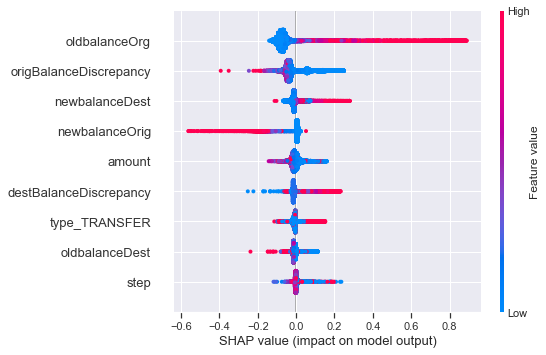

In [58]:
# Neural Network features summary
shap.summary_plot(shap_values[0], X_test2, feature_names=features)